In [28]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [29]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


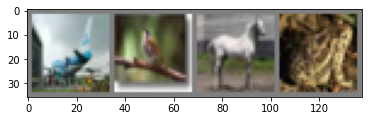

plane  bird horse  frog


In [36]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [30]:
import torch.nn as nn
import torch.nn.functional as F


class AlexNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


alexnet = AlexNet()

In [31]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9)

In [33]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0


[1,  2000] loss: 1.879
[1,  4000] loss: 1.677
[1,  6000] loss: 1.577
[1,  8000] loss: 1.500
[1, 10000] loss: 1.453
[1, 12000] loss: 1.415
[2,  2000] loss: 1.367
[2,  4000] loss: 1.316
[2,  6000] loss: 1.309
[2,  8000] loss: 1.267
[2, 10000] loss: 1.256
[2, 12000] loss: 1.223
[3,  2000] loss: 1.162
[3,  4000] loss: 1.168
[3,  6000] loss: 1.177
[3,  8000] loss: 1.163
[3, 10000] loss: 1.131
[3, 12000] loss: 1.143
[4,  2000] loss: 1.033
[4,  4000] loss: 1.085
[4,  6000] loss: 1.084
[4,  8000] loss: 1.060
[4, 10000] loss: 1.105
[4, 12000] loss: 1.059
[5,  2000] loss: 0.999
[5,  4000] loss: 1.016
[5,  6000] loss: 1.016
[5,  8000] loss: 0.990
[5, 10000] loss: 0.995
[5, 12000] loss: 1.039
[6,  2000] loss: 0.922
[6,  4000] loss: 0.942
[6,  6000] loss: 0.961
[6,  8000] loss: 0.966
[6, 10000] loss: 0.967
[6, 12000] loss: 0.975
[7,  2000] loss: 0.871
[7,  4000] loss: 0.890
[7,  6000] loss: 0.906
[7,  8000] loss: 0.918
[7, 10000] loss: 0.944
[7, 12000] loss: 0.931
[8,  2000] loss: 0.823
[8,  4000] 

In [39]:
PATH = './cifar_net.pth'
torch.save(alexnet.state_dict(), PATH)

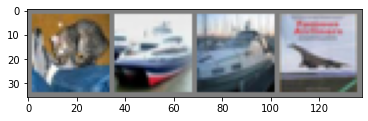

GroundTruth:    cat  ship  ship plane


In [37]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [40]:
net = AlexNet()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [41]:
outputs = net(images)

In [42]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car plane plane


In [43]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


In [44]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 68.1 %
Accuracy for class car   is: 78.1 %
Accuracy for class bird  is: 51.1 %
Accuracy for class cat   is: 42.3 %
Accuracy for class deer  is: 62.0 %
Accuracy for class dog   is: 44.5 %
Accuracy for class frog  is: 65.3 %
Accuracy for class horse is: 68.8 %
Accuracy for class ship  is: 72.2 %
Accuracy for class truck is: 70.4 %
